In [8]:
import torch
import matplotlib.pyplot as plt

from tick.hawkes import SimuHawkes, HawkesKernelExp

In [9]:
train_size = 1024
eval_size = 128
test_size = 128

marks = 1

In [10]:
train_seq = []
for _ in range(train_size):
    hawkes = SimuHawkes(n_nodes=marks, end_time=100, verbose=False)
    hawkes.set_kernel(i=0, j=0, kernel=HawkesKernelExp(intensity=0.2, decay=1.0))
    hawkes.set_baseline(i=0, baseline=0.1)
    hawkes.track_intensity(0.01)
    hawkes.simulate()

    timestamps = torch.FloatTensor(hawkes.intensity_tracked_times)
    intensity = torch.FloatTensor(hawkes.tracked_intensity[0])
    times = torch.FloatTensor(hawkes.timestamps[0])

    mask = torch.searchsorted(timestamps, times)
    mask = torch.cat([torch.zeros(1), mask, torch.ones(1) * len(timestamps)]).to(dtype=torch.long)
    cumu_intensity = torch.zeros_like(intensity)
    for start, end in zip(mask[:-1], mask[1:]):
        cumu_intensity[start: end] = torch.cumsum(intensity[start: end], dim=0)
    cumu_intensity *= 0.01

    seq = {
        'intensity': intensity,
        'cumu_intensity': cumu_intensity,
        'timestamps': timestamps,
        'times': times,
        'event_num': len(times)
    }
    train_seq.append(seq)

In [11]:
eval_seq = []
for _ in range(train_size):
    hawkes = SimuHawkes(n_nodes=marks, end_time=100, verbose=False)
    hawkes.set_kernel(i=0, j=0, kernel=HawkesKernelExp(intensity=0.2, decay=1.0))
    hawkes.set_baseline(i=0, baseline=0.1)
    hawkes.track_intensity(0.01)
    hawkes.simulate()

    timestamps = torch.FloatTensor(hawkes.intensity_tracked_times)
    intensity = torch.FloatTensor(hawkes.tracked_intensity[0])
    times = torch.FloatTensor(hawkes.timestamps[0])

    mask = torch.searchsorted(timestamps, times)
    mask = torch.cat([torch.zeros(1), mask, torch.ones(1) * len(timestamps)]).to(dtype=torch.long)
    cumu_intensity = torch.zeros_like(intensity)
    for start, end in zip(mask[:-1], mask[1:]):
        cumu_intensity[start: end] = torch.cumsum(intensity[start: end], dim=0)
    cumu_intensity *= 0.01

    seq = {
        'intensity': intensity,
        'cumu_intensity': cumu_intensity,
        'timestamps': timestamps,
        'times': times,
        'event_num': len(times)
    }
    eval_seq.append(seq)

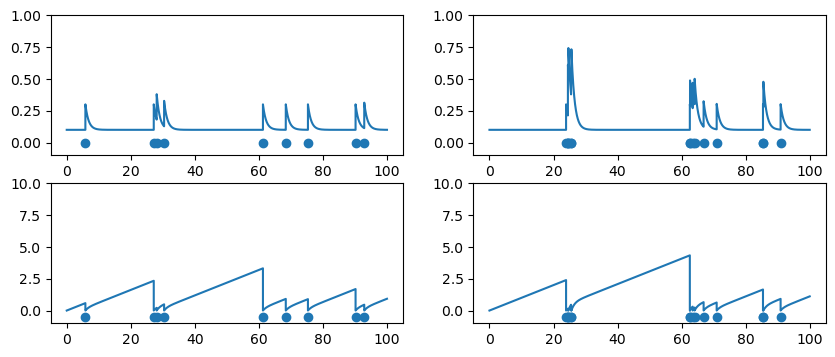

In [12]:
%matplotlib inline
fig, ax = plt.subplots(2, 2, figsize=(10, 4))

ax[0][0].set_ylim(-0.1, 1)
ax[0][1].set_ylim(-0.1, 1)
ax[1][0].set_ylim(-1, 10)
ax[1][1].set_ylim(-1, 10)

ax[0][0].plot(train_seq[0]['timestamps'], train_seq[0]['intensity'])
ax[0][0].scatter(train_seq[0]['times'], torch.zeros_like(train_seq[0]['times']))

ax[0][1].plot(eval_seq[0]['timestamps'], eval_seq[0]['intensity'])
ax[0][1].scatter(eval_seq[0]['times'], torch.zeros_like(eval_seq[0]['times']))

ax[1][0].plot(train_seq[0]['timestamps'], train_seq[0]['cumu_intensity'])
ax[1][0].scatter(train_seq[0]['times'], torch.zeros_like(train_seq[0]['times'])-0.5)

ax[1][1].plot(eval_seq[0]['timestamps'], eval_seq[0]['cumu_intensity'])
ax[1][1].scatter(eval_seq[0]['times'], torch.zeros_like(eval_seq[0]['times'])-0.5)

In [13]:
import pickle

with open(f'./data/hawkes_train_mark_{marks}_1024.pickle', 'wb') as f:
    pickle.dump(train_seq, f)

In [7]:
with open(f'./data/hawkes_eval_mark_{marks}.pickle', 'wb') as f:
    pickle.dump(eval_seq, f)